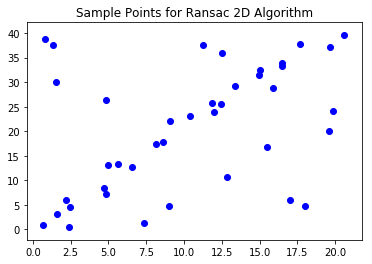

In [177]:


#generate set of random coordinates

inliersTolerance = 2
inliersCount = 20
inliers = [(i + random.random()*inliersTolerance, 
            2*(i + random.random()*inliersTolerance))
           for i in range(0, inliersCount)]

outliersCount = 20
outliers = [(random.random()*outliersCount, 
             2*(random.random()*outliersCount))
            for i in range(0, outliersCount)]


allpoints = inliers + outliers
for point in allpoints:
    plt.scatter(point[0], point[1], color="blue")
plt.title('Sample Points for Ransac 2D Algorithm')
plt.show()

In [28]:
import random
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import RANSACRegressor
import numpy as np


In [7]:
def ganerate_random_pairs():
    ind1 = random.randint(0,len(allpoints)-1)
    ind2 = random.randint(0,len(allpoints)-1)
    while ind1 == ind2:
        ind2 = random.randint(0,len(allpoints)-1)
    return (ind1, ind2)

In [8]:
def ransac_fit(all_points,number_of_iters = 100,
              tolerance=1):
    maximum_inlierscount = 0
    coefficents  = []
    for iteration in range(0,number_of_iters):
        ind1,ind2 = generate_random_pairs()
        A = all_points[ind1][1] - all_points[ind2][1]
        B = all_points[ind2][0] - all_points[ind1][0]
        C = all_points[ind1][0] * all_points[ind2][1] - all_points[ind2][0] * all_points[ind1][1]
#         print(A,B,C)
        inlierscount = 0
        for i in range(0, len(all_points)):
            dis = abs((A*all_points[i][0] + B*all_points[i][1]+C)/(pow(A*A + B*B, 0.5)))
            if dis <= tolerance:
                inlierscount += 1
#         print(inlierscount)
        if inlierscount > maximum_inlierscount:
            coefficents = [A,B,C]
            maximum_inlierscount = inlierscount
    return coefficents, maximum_inlierscount
            
        
    

In [13]:
coff,max_inliers = ransac_fit(allpoints, number_of_iters=100)
A,B,C = coff[0], coff[1],coff[2]
print(C)

0.123277217158


In [12]:
coff

[32.24948843723034, -16.297826619443057, 9.039664629832117]

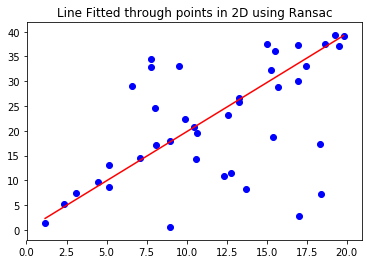

inliers count = 20


In [14]:
allxvalues = [point[0] for point in allpoints]

xvalues = [min(allxvalues), max(allxvalues)]
yvalues = [(-C-A*xvalues[0])/B, (-C-A*xvalues[1])/B]

plt.plot(xvalues, yvalues, color="red")
for point in allpoints:
    plt.scatter(point[0], point[1], color="blue")
plt.title('Line Fitted through points in 2D using Ransac')
plt.show()

print("inliers count = {0}".format(max_inliers))


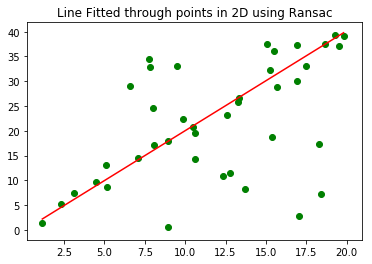

inliers count = 19


In [17]:
# example


numberOfIterations = 100
tolerance = 1
maximum_inlierscount = 0
coefficients = []

for iteration in range(0, numberOfIterations):
    (index1, index2) = generateRandomIndicesPair()
    #find the coefficients for the line
    #equation of line passing through two points is given by (y1 -y2)*X + (x2 - x1)*Y + (x1*y2 - y1*x2) = 0
    A = allpoints[index1][1] - allpoints[index2][1]
    B = allpoints[index2][0] - allpoints[index1][0]
    C = allpoints[index1][0]*allpoints[index2][1] - allpoints[index1][1]*allpoints[index2][0]
    
    #find the count of points lying within tolerance of this line
    inlierscount = 0
    for i in range(0, len(allpoints)):
        #perpendicular distance of point x1, y1 from line Ax + By + C = 0 is |Ax1 + By1 + C|/sqrt(A^2 + B^2)
        distance = abs(A*allpoints[i][0] + B*allpoints[i][1] + C)/(pow(A*A + B*B, 0.5))
        if distance < tolerance:
            inlierscount += 1
    if inlierscount > maximum_inlierscount:
        coefficients = [A, B, C]
        maximum_inlierscount = inlierscount

for point in allpoints:
    plt.scatter(point[0], point[1], color="green")
A = coefficients[0]
B = coefficients[1]
C = coefficients[2]

allxvalues = [point[0] for point in allpoints]

xvalues = [min(allxvalues), max(allxvalues)]
yvalues = [(-C-A*xvalues[0])/B, (-C-A*xvalues[1])/B]

plt.plot(xvalues, yvalues, color="red")
plt.title('Line Fitted through points in 2D using Ransac')
plt.show()

print("inliers count = {0}".format(maximum_inlierscount))



In [16]:
#function to generate pair of random indices
def generateRandomIndicesPair():
    index1 = random.randint(0, len(allpoints)-1)
    index2 = random.randint(0, len(allpoints)-1)
    while index1 == index2:
        index2 = random.randint(0,len(allpoints)-1)

    return(index1, index2)


In [ ]:
m = (n∑xy - ∑y∑x)/n∑x2 - (∑x)2

b = (∑y - m∑x)/n

In [18]:
#Least square error method

def least_square_fit(all_points):
    x = [point[0] for point in all_points]
    y = [point[1] for point in all_points]
    n = len(all_points)
    
    #calculating b
    x_sum = sum(x)
    y_sum  = sum(y)
    # for sum of product of x and y
    sxsy = 0
 
    # sum of square of x
    sx2 = 0
 
    for i in range(n):
        sxsy += x[i] * y[i]
        sx2 += x[i] * x[i]
    m = (n*sxsy- x_sum*y_sum)/(n*sx2-x_sum*x_sum)
    c = (y_sum - m*x_sum)/n
    return m,c

    
        

In [19]:
m,c=least_square_fit(allpoints)

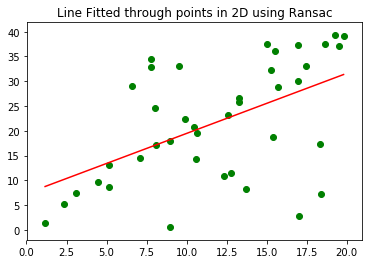

inliers count = 19


In [20]:
allxvalues = [point[0] for point in allpoints]
# plt.plot(xvalues, yvalues, color="red")

xvalues = [min(allxvalues), max(allxvalues)]
yvalues = [m*xvalues[0]+c, m*xvalues[1]+c]

plt.plot(xvalues, yvalues, color="red")
for point in allpoints:
    plt.scatter(point[0], point[1], color="green")
plt.title('Line Fitted through points in 2D using Ransac')
plt.show()

print("inliers count = {0}".format(maximum_inlierscount))


19


[]

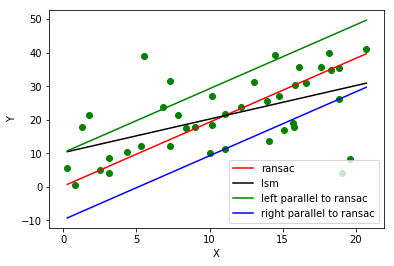

In [178]:
inliersTolerance = 2
inliersCount = 20
inliers = [(i + random.random()*inliersTolerance, 
            2*(i + random.random()*inliersTolerance))
           for i in range(0, inliersCount)]

outliersCount = 20
outliers = [(random.random()*outliersCount, 
             2*(random.random()*outliersCount))
            for i in range(0, outliersCount)]
outliers.append([10,10])
allpoints = inliers + outliers
# inliersCount = 30
# inliersTolerance= 2


# left_points = [(2 + random.random()*inliersTolerance, 
#             i + random.random()*inliersTolerance)
#            for i in range(0, inliersCount)]

# right_points = [(10 + random.random()*inliersTolerance, 
#             i + random.random()*inliersTolerance)
#            for i in range(0, inliersCount)]
# allpoints = None
# allpoints = left_points # + right_points





allxvalues = [point[0] for point in allpoints]
# print(allxvalues)
m,c=least_square_fit(allpoints)
coff,max_inliers = ransac_fit(allpoints, number_of_iters=100)
A,B,C = coff[0], coff[1],coff[2]
print(max_inliers)

xvalues = [min(allxvalues), max(allxvalues)]
yvalues_least = [m*xvalues[0]+c, m*xvalues[1]+c]

yvalues_ransac = [(-C-A*xvalues[0])/B, (-C-A*xvalues[1])/B]
left_off_set_line_ransac = [(-C-A*xvalues[0])/B + 10, (-C-A*xvalues[1])/B+10]
right_off_set_line_ransac = [(-C-A*xvalues[0])/B - 10, (-C-A*xvalues[1])/B-10]


for point in allpoints:
    plt.scatter(point[0], point[1], color="green")
plt.plot(xvalues, yvalues_ransac, color="red",label="ransac")
plt.plot(xvalues, yvalues_least, color="black",label="lsm")
plt.plot(xvalues, left_off_set_line_ransac, color="green", label="left parallel to ransac")
plt.plot(xvalues, right_off_set_line_ransac, color="blue", label="right parallel to ransac")

# plt.xlim(0,5)
# plt.ylim(0,20)
plt.legend(loc="lower right")
plt.xlabel("X")
plt.ylabel("Y")

plt.plot()
  
    


In [62]:
# Define the RANSAC fitting function for a single line
def fit_ransac(data):
    np_arr = np.array(data)
      
    x, y = np_arr[:,0],np_arr[:,1]
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]
#     z = z[:, np.newaxis]
    ransac = RANSACRegressor()
    ransac.fit(x, y)
    return ransac.estimator_.coef_

fit_ransac(all_points)

array([[-10.76667166]])

[3.923523295670292, 2.799031616530172, 2.90854477283108, 3.7769137026088027, 3.5450353973131947, 2.714753077056052, 3.6730864694903533, 2.832446382626956, 2.92006159336818, 2.985109504695348, 3.1170665146797805, 3.1001071292175597, 2.9393036809398865, 3.4087927001172926, 2.4369989091581807, 2.8403735088795514, 3.27138699342081, 3.8906702173065932, 2.945591860455369, 2.920671331698362, 2.1005748163030784, 2.2061927557207004, 2.244986926875209, 2.6658974898991334, 3.605656036210556, 2.5141591546845246, 2.976604822436477, 3.752219830107543, 2.703326312516583, 2.900547498257473]
30


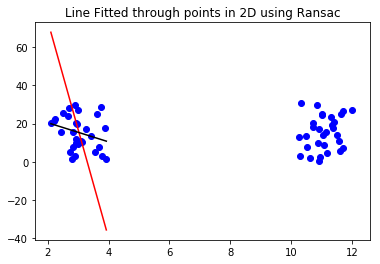

In [179]:
inliersCount = 30
inliersTolerance= 2


left_points = [(2 + random.random()*inliersTolerance, 
            i + random.random()*inliersTolerance)
           for i in range(0, inliersCount)]

right_points = [(10 + random.random()*inliersTolerance, 
            i + random.random()*inliersTolerance)
           for i in range(0, inliersCount)]
allpoints = left_points#+ right_points
for point in  left_points+ right_points:
    plt.scatter(point[0], point[1], color="blue")
plt.title('Line Fitted through points in 2D using Ransac')

allxvalues = [point[0] for point in allpoints]
allyvalues = [point[1] for point in allpoints]

print(allxvalues)
m,c=least_square_fit(allpoints)
coff,max_inliers = ransac_fit(allpoints, number_of_iters=100)
A,B,C = coff[0], coff[1],coff[2]
print(max_inliers)

xvalues = [min(allxvalues), max(allxvalues)]
y_val = [min(allyvalues), max(allyvalues)]
yvalues_least= [m*xvalues[0]+c, m*xvalues[1]+c]

yvalues_ransac = [(-C-A*xvalues[0])/B, (-C-A*xvalues[1])/B]

# for point in allpoints:
#     plt.scatter(point[0], point[1], color="green")
plt.plot(xvalues, yvalues_ransac, color="red")
plt.plot(xvalues, yvalues_least, color="black")
plt.plot()


plt.show()

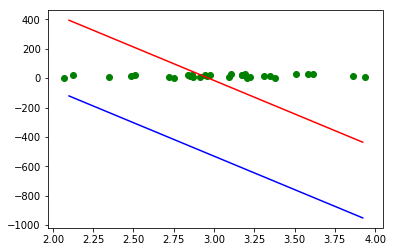

In [188]:
inliersCount = 30
inliersTolerance= 2


left_points = [(2 + random.random()*inliersTolerance, 
            i + random.random()*inliersTolerance)
           for i in range(0, inliersCount)]
for point in left_points:
    plt.scatter(point[0], point[1], color="green")

    
# ransac

coff,max_inliers = ransac_fit(allpoints, number_of_iters=100)
A,B,C = coff[0], coff[1],coff[2]
xvalues = [min(allxvalues), max(allxvalues)]
yvalues_ransac = [(-C-A*xvalues[0])/B, (-C-A*xvalues[1])/B]
off_set = 20
c2 = off_set*math.sqrt(1+(-B/A)) + C

yvalues_ransac_off_set = [((-c2-A*xvalues[0])/B ), ((-c2-A*xvalues[1])/B)]
# yvalues_ransac_off_set= yvalues_ransac_off_set 

plt.plot(xvalues, yvalues_ransac, color="red")
plt.plot(xvalues, yvalues_ransac_off_set, color="blue")




    
# plt.xlim(-10,10)
# plt.ylim(-10,30)
plt.show()


In [22]:
all_points

[(3.6145963776020933, 1.0886997469688995),
 (3.6714631423278066, 1.0226884790116462),
 (3.7946194615503233, 2.9135961143683824),
 (2.0614772062345694, 3.749936989417919),
 (3.7908013823054967, 5.166317040398034),
 (2.5465700814409145, 5.497172552041358),
 (3.1167632206153355, 7.0151058696155335),
 (3.1506531644871574, 8.990276620308366),
 (2.51510484512972, 8.792023909280928),
 (3.1879323635239927, 9.530415986737248),
 (3.3408222150202027, 11.838325764412101),
 (3.2590535079722254, 12.363636480252174),
 (2.286195475759883, 12.72434402098297),
 (3.961284694331641, 14.512556391864255),
 (2.7790490904908154, 15.140285713750641),
 (2.3557861276258576, 15.79429082267112),
 (2.427384719189156, 17.647829211062778),
 (3.064010242246131, 17.349570228674743),
 (3.576760622870328, 19.536845930151006),
 (2.88668375697256, 19.377344651906352),
 (3.3265585867960104, 21.781922539726384),
 (3.9533579153971385, 21.219668997423366),
 (3.215799049159696, 23.793293954137564),
 (3.8019042176832274, 23.8827

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


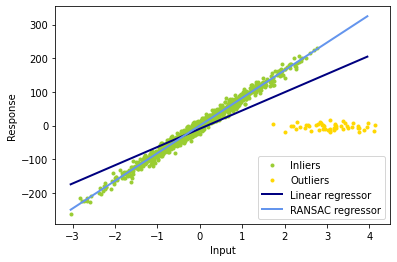

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

In [5]:
X[0]

array([3.88202617])

In [3]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)


LinearRegression()

In [6]:
x = np.array([[1,2,4,5]])

In [11]:
class A:
    a= 2
    b = 22
a = A()
print(a)